In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import tensorflow as tf

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

## Categorical to numerical data conversion

In [6]:
df = pd.get_dummies(df, columns=["Gender", "Geography"])

In [7]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [8]:
df["Tenure"].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

## Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
df[features] = sc.fit_transform(df[features])

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,2,-1.225848,1,1,1,0.021886,1,1,0,1,0,0
1,-0.440036,0.198164,1,0.117350,1,0,1,0.216534,0,1,0,0,0,1
2,-1.536794,0.293517,8,1.333053,3,1,0,0.240687,1,1,0,1,0,0
3,0.501521,0.007457,1,-1.225848,2,0,0,-0.108918,0,1,0,1,0,0
4,2.063884,0.388871,2,0.785728,1,1,1,-0.365276,0,1,0,0,0,1


## Model building

In [11]:
x = df.copy()
x.drop(columns=["Exited"], inplace=True)
y = df["Exited"]

In [12]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Data splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Keras

In [15]:
x_train.shape

(8000, 13)

In [16]:
from tensorflow import keras

In [17]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(13,), activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")         #1 bec we only have 1 output
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.4472 - accuracy: 0.8024
Epoch 2/20
250/250 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8270
Epoch 3/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3921 - accuracy: 0.8390
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8470: 0s - loss: 0
Epoch 5/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3474 - accuracy: 0.8561
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.8593
Epoch 7/20
250/250 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8637
Epoch 8/20
250/250 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8662
Epoch 9/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8662
Epoch 10/20
250/250 [=======================

In [18]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8620


[0.34364432096481323, 0.8619999885559082]

In [19]:
y_predict = model.predict(x_test)

In [20]:
y_predict

array([[0.06137741],
       [0.12121722],
       [0.08134606],
       ...,
       [0.01076779],
       [0.04455751],
       [0.62936604]], dtype=float32)

In [21]:
for i in range(len(y_predict)):
    if y_predict[i] > 0.5:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
y_predict

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [23]:
from sklearn.metrics import confusion_matrix

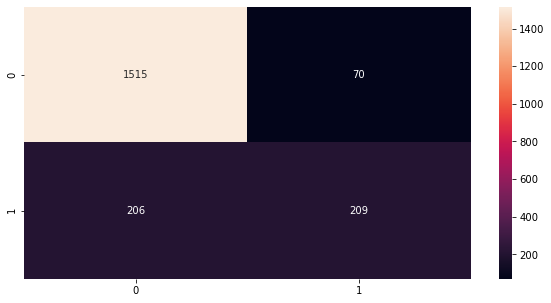

In [25]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.862